In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
# 데이터 불러오기 및 전처리
data = pd.read_csv("머신러닝 전처리 데이터.csv", encoding='euc-kr')
time_series = data["계약날짜"]

In [ ]:
# ... 필요한 전처리 수행

# ARIMA 모델 생성 및 학습
p, d, q = 1, 1, 1  # 예시로 p, d, q 값을 설정, 실제로는 조정 필요
model = ARIMA(time_series, order=(p, d, q))
model_fit = model.fit(disp=0)

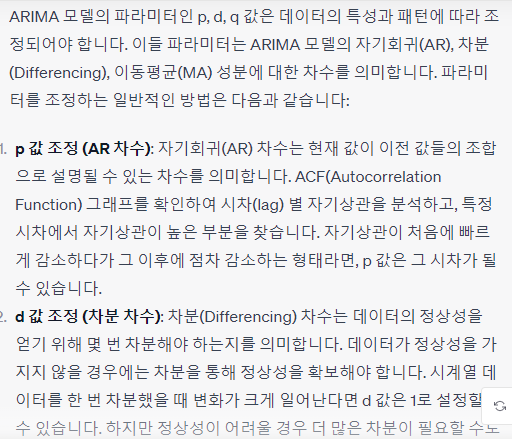
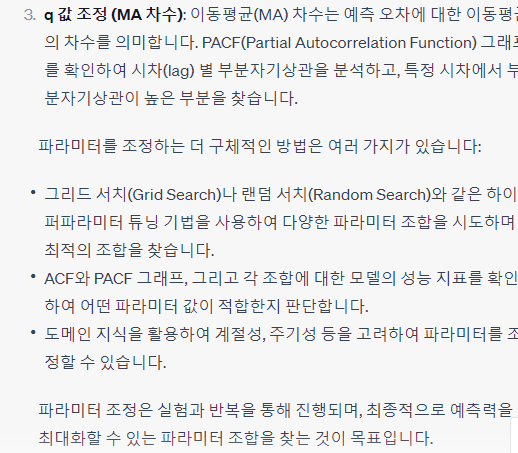

In [ ]:
# 예측 수행
start_index = len(time_series) - len(test_data)  # 테스트 데이터 시작 인덱스
end_index = len(time_series) - 1  # 테스트 데이터 마지막 인덱스
forecast = model_fit.predict(start=start_index, end=end_index)

In [ ]:
# 성능 평가
mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error:", mse)

In [ ]:
# 결과 시각화
plt.plot(test_data, label="Actual")
plt.plot(forecast, color='red', label="Forecast")
plt.legend()
plt.show()

# VAR 모델링 시도

In [20]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller  # adfuller 함수를 import 추가

# 데이터 불러오기 및 전처리
data = pd.read_csv("머신러닝 전처리 데이터.csv", encoding='euc-kr')
# ... 필요한 전처리 수행
data

,시군구,단지명,전용면적(㎡),계약년월,계약일,계약날짜,층,건축나이,거래건수,기준금리,법정동코드,지하철역수,거래금액(만원)
0,광주광역시 광산구 도산동,대덕1,59.3100,202303,18,2023-03-18,4,33,20,3.5,2920010200,1,9800
1,광주광역시 광산구 도산동,대주피오레1차,84.9800,202302,7,2023-02-07,2,23,14,3.5,2920010200,1,21000
2,광주광역시 광산구 도산동,대주피오레1차,84.9800,202305,31,2023-05-31,5,23,16,3.5,2920010200,1,22350
3,광주광역시 광산구 도산동,대주피오레2차,84.7575,202305,9,2023-05-09,5,22,16,3.5,2920010200,1,22400
4,광주광역시 광산구 도산동,대주피오레2차,84.7575,202305,13,2023-05-13,13,22,16,3.5,2920010200,1,22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425074,광주광역시 서구 화정동,화정우미,115.1850,200611,10,2006-11-10,17,10,131,4.5,2914011900,1,19000
425075,광주광역시 서구 화정동,화정우미,84.8300,200611,27,2006-11-27,6,10,131,4.5,2914011900,1,12000
425076,광주광역시 서구 화정동,화정우미,59.8300,200611,30,2006-11-30,2,10,131,4.5,2914011900,1,7700
425077,광주광역시 서구 화정동,화정우미,84.8400,200612,6,2006-12-06,16,10,124,4.5,2914011900,1,12170


In [19]:
# 날짜 데이터를 숫자로 변환하여 시간 변수 생성
data["numeric_time"] = range(1, len(data) + 1)
time_series = data["numeric_time"]
time_series

0              1
1              2
2              3
3              4
4              5
           ...  
425074    425075
425075    425076
425076    425077
425077    425078
425078    425079
Name: numeric_time, Length: 425079, dtype: int64

In [22]:
data.head()

,시군구,단지명,전용면적(㎡),계약년월,계약일,계약날짜,층,건축나이,거래건수,기준금리,법정동코드,지하철역수,거래금액(만원)
0,광주광역시 광산구 도산동,대덕1,59.3100,202303,18,2023-03-18,4,33,20,3.5,2920010200,1,9800
1,광주광역시 광산구 도산동,대주피오레1차,84.9800,202302,7,2023-02-07,2,23,14,3.5,2920010200,1,21000
2,광주광역시 광산구 도산동,대주피오레1차,84.9800,202305,31,2023-05-31,5,23,16,3.5,2920010200,1,22350
3,광주광역시 광산구 도산동,대주피오레2차,84.7575,202305,9,2023-05-09,5,22,16,3.5,2920010200,1,22400
4,광주광역시 광산구 도산동,대주피오레2차,84.7575,202305,13,2023-05-13,13,22,16,3.5,2920010200,1,22000


In [27]:
data = data.drop(columns=['시군구', '단지명'])

KeyError: "['시군구', '단지명'] not found in axis"

In [30]:
data = data. drop(columns=['계약날짜'])

In [31]:
data.head()

,전용면적(㎡),계약년월,계약일,층,건축나이,거래건수,기준금리,법정동코드,지하철역수,거래금액(만원)
0,59.3100,202303,18,4,33,20,3.5,2920010200,1,9800
1,84.9800,202302,7,2,23,14,3.5,2920010200,1,21000
2,84.9800,202305,31,5,23,16,3.5,2920010200,1,22350
3,84.7575,202305,9,5,22,16,3.5,2920010200,1,22400
4,84.7575,202305,13,13,22,16,3.5,2920010200,1,22000


In [23]:
# 정상성 확인: Augmented Dickey-Fuller (ADF) 테스트
def check_stationarity(ts):
    result = adfuller(ts)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

In [24]:
check_stationarity(time_series)

ADF Statistic: -530.3418869562896
p-value: 0.0
Critical Values: {'1%': -3.430365387151838, '5%': -2.8615468009373535, '10%': -2.566773619890984}


### 정상성이란?
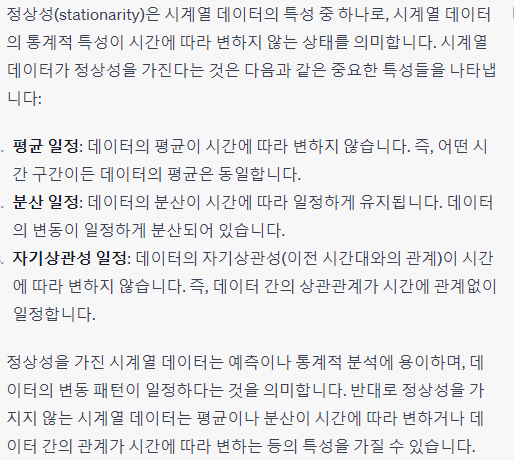
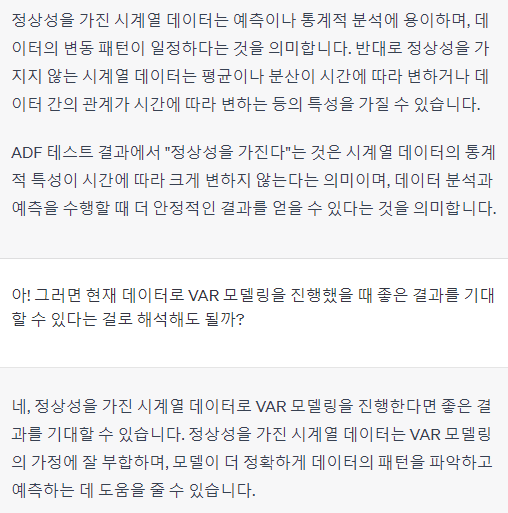
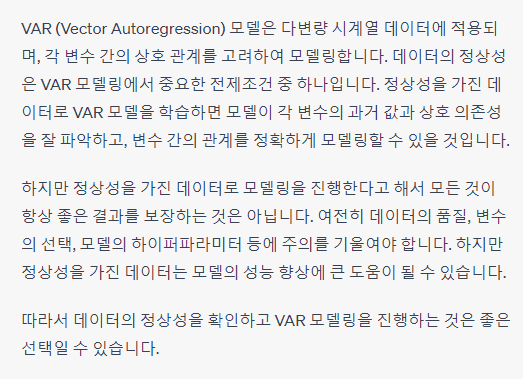

### 위의 결과값 해석
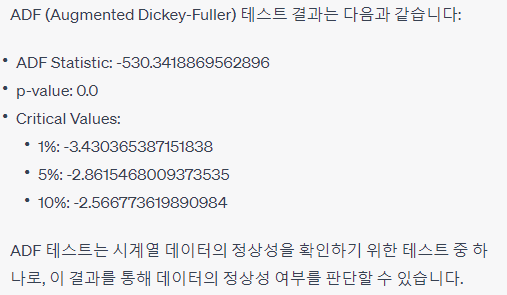
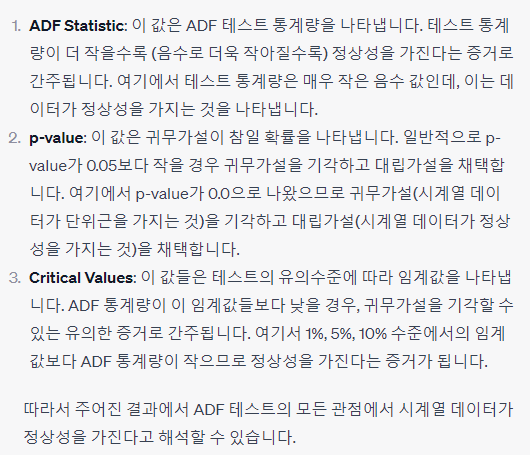

In [16]:
# 차분(Differencing)
differenced = time_series.diff().dropna()  # 1차 차분
differenced

1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
         ... 
425074    1.0
425075    1.0
425076    1.0
425077    1.0
425078    1.0
Name: numeric_time, Length: 425078, dtype: float64

In [18]:
differenced = time_series.diff(2).dropna()  # 2차 차분
differenced

2         2.0
3         2.0
4         2.0
5         2.0
6         2.0
         ... 
425074    2.0
425075    2.0
425076    2.0
425077    2.0
425078    2.0
Name: numeric_time, Length: 425077, dtype: float64

In [32]:
# 최적의 p 값을 찾기 위한 그리드 서치
best_aic = float("inf")
best_p = 0

for p_value in range(1, 11):  # 범위 설정, 필요에 따라 조정
    model = VAR(data)
    model_fit = model.fit(p_value)
    aic = model_fit.aic
    
    if aic < best_aic:
        best_aic = aic
        best_p = p_value

print("Best p value:", best_p)


Best p value: 10


In [33]:
# VAR 모델 생성 및 학습
p = 10  # 예시로 p 값을 설정, 실제로는 조정 필요
model = VAR(data)
model_fit = model.fit(p)

In [35]:
# 모델 학습 결과 출력
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Aug, 2023
Time:                     17:31:06
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    50.3178
Nobs:                     425069.    HQIC:                   50.2992
Log likelihood:      -1.67192e+07    FPE:                6.94128e+21
AIC:                      50.2918    Det(Omega_mle):     6.92481e+21
--------------------------------------------------------------------
Results for equation 전용면적(㎡)
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const              360.114854        31.292790           11.508           0.000
L1.전용면적(㎡)           0.296868         0.002140          138.725           0.000
L1.계약년월             -0.027809         0.010710           -2.59

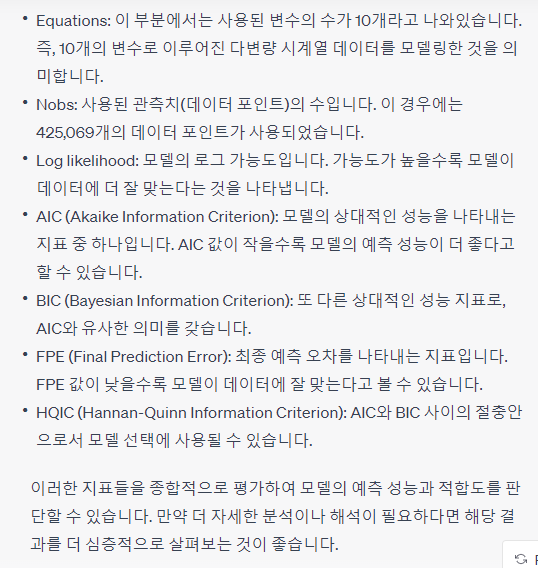

In [115]:
# 예측을 위한 데이터 생성 (p만큼 이전 관측치를 사용)
test_data = data.iloc[-p:].values # p = 10 이었음

# 모델을 사용하여 예측 수행
num_steps = 100
forecast = model_fit.forecast(test_data, num_steps)
forecast = forecast[:len(test_data)]

# 예측 결과 출력
print("Forecast:", forecast)

Forecast: [[9.38159703e+01 2.00611859e+05 1.40283986e+01 8.99462079e+00
  9.96533128e+00 1.23601772e+02 4.49520910e+00 2.91401554e+09
  9.97363956e-01 1.35674577e+04]
 [9.34650011e+01 2.00611711e+05 1.49302505e+01 8.68527242e+00
  9.97885671e+00 1.22274568e+02 4.49016019e+00 2.91401854e+09
  9.94318366e-01 1.34983603e+04]
 [9.23867931e+01 2.00611591e+05 1.56537923e+01 8.93035460e+00
  9.98328921e+00 1.21716940e+02 4.48859147e+00 2.91402202e+09
  9.91439381e-01 1.32437037e+04]
 [9.17729024e+01 2.00611546e+05 1.51007518e+01 8.96369089e+00
  9.99329517e+00 1.22748258e+02 4.48569585e+00 2.91402554e+09
  9.88602922e-01 1.29529469e+04]
 [9.13319281e+01 2.00611532e+05 1.52185465e+01 9.16976507e+00
  9.94058471e+00 1.23339046e+02 4.48176838e+00 2.91402995e+09
  9.85045937e-01 1.28916918e+04]
 [9.07028058e+01 2.00611529e+05 1.54932293e+01 9.02656807e+00
  9.90620143e+00 1.23329171e+02 4.47829038e+00 2.91403223e+09
  9.82364660e-01 1.28411703e+04]
 [9.01390928e+01 2.00611490e+05 1.59328617e+01 8

In [116]:
# 예측 변수 선택 (거래금액(만원) 변수에 해당하는 열 인덱스 사용)
target_variable_index = data.columns.get_loc('거래금액(만원)')

# 예측 변수 예측값 가져오기
forecasted_value = forecast[0][target_variable_index]

# 결과 출력
print("Forecasted 거래금액(만원):", forecasted_value)

Forecasted 거래금액(만원): 13567.457715284312


In [ ]:
import numpy as np

In [117]:
# 성능 평가
# 예측값을 여러 개의 샘플로 만들기
forecast_samples = np.repeat(forecast, num_steps, axis=0)

In [118]:
# valueError의 원인을 찾기 위해 데이터 타입과 배열 등을 확인
print("Forecast shape:", forecast.shape)
print("Test data shape:", test_data.shape)
print(type(forecast))
print(type(test_data))

Forecast shape: (10, 10)
Test data shape: (10, 10)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [122]:
forecast_matched = forecast[:len(test_data)]
forecast_matched

array([[9.38159703e+01, 2.00611859e+05, 1.40283986e+01, 8.99462079e+00,
        9.96533128e+00, 1.23601772e+02, 4.49520910e+00, 2.91401554e+09,
        9.97363956e-01, 1.35674577e+04],
       [9.34650011e+01, 2.00611711e+05, 1.49302505e+01, 8.68527242e+00,
        9.97885671e+00, 1.22274568e+02, 4.49016019e+00, 2.91401854e+09,
        9.94318366e-01, 1.34983603e+04],
       [9.23867931e+01, 2.00611591e+05, 1.56537923e+01, 8.93035460e+00,
        9.98328921e+00, 1.21716940e+02, 4.48859147e+00, 2.91402202e+09,
        9.91439381e-01, 1.32437037e+04],
       [9.17729024e+01, 2.00611546e+05, 1.51007518e+01, 8.96369089e+00,
        9.99329517e+00, 1.22748258e+02, 4.48569585e+00, 2.91402554e+09,
        9.88602922e-01, 1.29529469e+04],
       [9.13319281e+01, 2.00611532e+05, 1.52185465e+01, 9.16976507e+00,
        9.94058471e+00, 1.23339046e+02, 4.48176838e+00, 2.91402995e+09,
        9.85045937e-01, 1.28916918e+04],
       [9.07028058e+01, 2.00611529e+05, 1.54932293e+01, 9.02656807e+00,
   

In [123]:
# 실제값과 예측값 사이의 MSE 계산
mse = mean_squared_error(forecast_matched, test_data)

# 결과 출력
print("Mean Squared Error:", mse)

Mean Squared Error: 43562653.0377625


In [124]:
# 실제값과 예측값 비교
rmse = mean_squared_error(test_data, forecast_matched, squared=False)
print("RMSE:", rmse)


RMSE: 2486.268489428913
